In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import HTML

%matplotlib inline

In [3]:
folder_path = '..\House prices'

In [4]:
# Load train and test data so that we can do data prep together
filename = folder_path+"\\"+"train.csv"
train_data = pd.DataFrame.from_csv(filename)

filename = folder_path+"\\"+"test.csv"
test_data = pd.DataFrame.from_csv(filename)

sales_data = train_data.pop("SalePrice")

full_data = train_data.append(test_data)

print(train_data.shape)
print(test_data.shape)

(1460, 79)
(1459, 79)


In [5]:
HTML(full_data.describe().to_html())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
def data_prep(X):

    # Deal with non-numeric columns    
    X = pd.get_dummies(X)    
        
        
    # Return only numeric columns
    X = X._get_numeric_data()
    
    # Find nulls and replace with 0
    X = X.apply(lambda x: x.fillna(x.median()),axis=0)
    
    # Drop columns with little data
    X = X.drop(['PoolQC_Gd','PoolQC_Fa','PoolQC_Ex'], axis=1)
    
    
    return X

In [7]:
full_df = data_prep(full_data)

Now seperate out the train and test data again

In [8]:
train_df = full_df.iloc[:train_data.shape[0],:]
test_df = full_df.iloc[train_data.shape[0]:,:]

In [9]:
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,50,85.0,14115,5,5,1993,1995,0.0,732.0,0.0,...,0,0,0,1,0,0,0,0,1,0
7,20,75.0,10084,8,5,2004,2005,186.0,1369.0,0.0,...,0,0,0,1,0,0,0,0,1,0
8,60,68.0,10382,7,6,1973,1973,240.0,859.0,32.0,...,0,0,0,1,0,0,0,0,1,0
9,50,51.0,6120,7,5,1931,1950,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [10]:
HTML(train_df.describe().to_html())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,Garage

In [11]:
for i in range(10):
    #Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(train_df, sales_data, test_size=0.15) #, random_state=42)

    # fit a linear regression 
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print("LR:", sqrt(mean_squared_error(y_pred, y_test)))
    
    
    # fit a random forest too
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    print("RF:", sqrt(mean_squared_error(rf_pred, y_test)))
    
    
    ens_pred = 0.5*(y_pred+rf_pred)
    
    print("EN:", sqrt(mean_squared_error(ens_pred, y_test)))

LR: 40944.84744265093
RF: 36932.703912658995
EN: 36840.12351685023
LR: 26682.34022912934
RF: 31976.75087647745
EN: 27036.787979337616
LR: 26328.17614383217
RF: 26575.392943122588
EN: 23029.729975219525
LR: 27585.788495417964
RF: 27979.443964771857
EN: 23987.27327125237
LR: 24341.835404789665
RF: 27523.111892750567
EN: 22634.230162589298
LR: 27779.147571776117
RF: 34114.12892205305
EN: 27845.914772194883
LR: 66409.64949406567
RF: 35991.85030752982
EN: 46389.85884975812
LR: 40349.88486902033
RF: 39853.71020041402
EN: 38223.195426344995
LR: 26562.88851336801
RF: 27754.51655113972
EN: 23724.902657607865
LR: 23394.918763872494
RF: 24913.14922940903
EN: 20688.526814776807


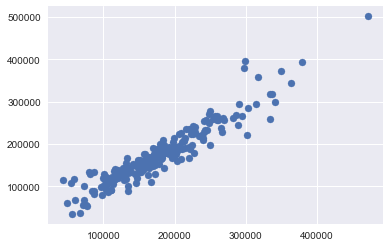

In [12]:
plt.scatter(y_pred, y_test);

In [13]:
def validate_predictions(y_pred):
    if (y_pred < 0).any():
        print('Negatives')
    elif (y_pred < 10000).any():
        print('Low sales value')
    elif (y_pred > 1000000).any():
        print('High sales value')    
    else:
        print('No obvious errors')

In [14]:
validate_predictions(y_pred)

No obvious errors


In [15]:
# feature coefficients may have useful info
ft_coefs = pd.DataFrame(data={'Feature':X_train.columns, 'Coef':reg.coef_})
ft_coefs.sort_values(by='Coef')

,Coef,Feature
124,-649974.348266,RoofMatl_ClyTile
101,-204374.313938,Condition2_PosN
269,-103523.302629,MiscFeature_TenC
266,-99534.006929,MiscFeature_Gar2
254,-90247.133613,GarageCond_Ex
222,-67161.279871,Electrical_Mix
252,-43851.767458,GarageQual_Po
152,-40771.309654,Exterior2nd_CmentBd
102,-39565.143745,Condition2_RRAe
284,-31530.235643,SaleCondition_Partial


In [16]:
ft_imps = pd.DataFrame(data={'Feature':X_train.columns, 'Imp':rf.feature_importances_})
ft_imps.sort_values(by='Imp', ascending=False)

,Feature,Imp
3,OverallQual,0.582991
15,GrLivArea,0.118713
11,TotalBsmtSF,0.047148
13,2ndFlrSF,0.041862
8,BsmtFinSF1,0.031781
25,GarageCars,0.016310
12,1stFlrSF,0.016007
2,LotArea,0.012378
26,GarageArea,0.010210
22,TotRmsAbvGrd,0.008314


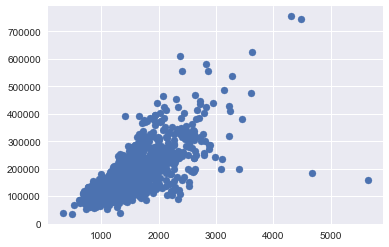

In [17]:
plt.scatter(X_train['GrLivArea'],y_train);

In [18]:
y_infer = reg.predict(test_df)
rf_infer = rf.predict(test_df)

y_infer = 0.5*(y_infer + rf_infer)

In [19]:
y_infer

array([121090.73872399, 149841.88228373, 193563.71873071, ...,
       158491.08832721, 107322.48744449, 219841.4385647 ])

In [20]:
validate_predictions(y_infer)

No obvious errors


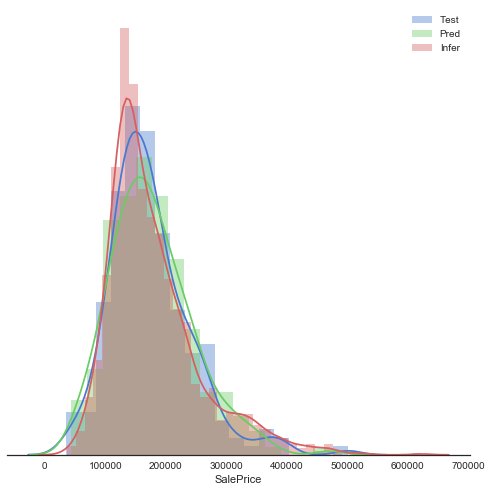

In [21]:
# Visualise the sales price distribution

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Plot a historgram and kernel density estimate
sns.distplot(y_test.astype(int))
sns.distplot(y_pred.astype(int))
sns.distplot(y_infer.astype(int))


plt.setp(axes, yticks=[])
plt.tight_layout()

plt.legend(['Test','Pred','Infer'])

In [22]:
test_df['SalePrice'] = y_infer

C:\Users\adamy\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
test_df['SalePrice'].to_csv('Submission2.csv', header=True)